In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
np.random.seed(42)

pd.set_option('display.max_rows', 500)


In [2]:
csv_path = "../../../../../../data/benzinga/"

In [3]:
df = pd.read_csv(csv_path + "20100101_to_20220214.csv", low_memory=False, index_col="id")

In [4]:
df.tail()

,date,author,created,updated,title,teaser,body,url,image,channels,stocks,tags
id,,,,,,,,,,,,
25615650.0,2022-02-14,Benzinga Insights,"Mon, 14 Feb 2022 18:05:27 -0400","Mon, 14 Feb 2022 18:05:27 -0400",Analyst Ratings For Tesla,Tesla (NASDAQ:TSLA) has observed the following...,"<p>Tesla (NASDAQ:<a class=""ticker"" href=""https...",https://www.benzinga.com/analyst-ratings/22/02...,"[{'size': 'thumb', 'url': 'https://cdn.benzing...",[{'name': 'Analyst Ratings'}],[{'name': 'TSLA'}],[{'name': 'BZI-AAR'}]
25608690.0,2022-02-14,Chris Katje,"Mon, 14 Feb 2022 17:50:33 -0400","Mon, 14 Feb 2022 18:09:37 -0400",Here's Why Obi-Wan Kenobi Series Is Being Rele...,One of the most anticipated streaming shows in...,<p>One of the most anticipated streaming shows...,https://www.benzinga.com/general/entertainment...,"[{'size': 'thumb', 'url': 'https://cdn.benzing...","[{'name': 'Entertainment'}, {'name': 'News'}, ...","[{'name': 'AMZN'}, {'name': 'DIS'}]","[{'name': 'box office'}, {'name': 'Disney Plus..."
25619641.0,2022-02-14,Benzinga Newsdesk,"Mon, 14 Feb 2022 18:11:01 -0400","Mon, 14 Feb 2022 18:11:01 -0400",Intel Is Near ~$6B Deal To Buy Tower Semi,-Bloomberg,<p>-Bloomberg</p>,https://www.benzinga.com/m-a/22/02/25619641/in...,[],"[{'name': 'M&A'}, {'name': 'News'}, {'name': '...","[{'name': 'INTC'}, {'name': 'TSEM'}]",[]
25620088.0,2022-02-14,Benzinga Newsdesk,"Mon, 14 Feb 2022 18:23:46 -0400","Mon, 14 Feb 2022 18:23:47 -0400",13F For Dan Loeb's Third Point Shows Stake In ...,-Reuters,<p>-Reuters</p>,https://www.benzinga.com/news/22/02/25620088/1...,[],"[{'name': 'News'}, {'name': 'Rumors'}, {'name'...","[{'name': 'APO'}, {'name': 'ATVI'}, {'name': '...",[]
25620455.0,2022-02-14,Benzinga Newsdesk,"Mon, 14 Feb 2022 18:35:18 -0400","Mon, 14 Feb 2022 18:35:18 -0400",UPDATE: 13F From Dan Loeb's Third Point Shows ...,-Reuters,<p>-Reuters</p>,https://www.benzinga.com/general/hedge-funds/2...,[],"[{'name': 'Hedge Funds'}, {'name': 'General'}]","[{'name': 'AES'}, {'name': 'CMCSA'}, {'name': ...",[]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 182757 entries, 74371.0 to 25620455.0
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      182667 non-null  object
 1   author    182747 non-null  object
 2   created   182757 non-null  object
 3   updated   182757 non-null  object
 4   title     182745 non-null  object
 5   teaser    24606 non-null   object
 6   body      146716 non-null  object
 7   url       182577 non-null  object
 8   image     182577 non-null  object
 9   channels  182577 non-null  object
 10  stocks    182577 non-null  object
 11  tags      182577 non-null  object
dtypes: object(12)
memory usage: 18.1+ MB


In [6]:
def has_ticker(stocks, ticker):
    answer = False
    
    if ticker in stocks:
        answer = True

    return answer

In [7]:
data = [{
    "id": 745326,
    "author": "Benzinga",
    "created": "Mon, 03 Jan 2011 07:30:00 -0400",
    "updated": "Mon, 03 Jan 2011 07:39:48 -0400",
    "title": "Fidelity's Biggest Stock Picks Going Into 2011",
    "teaser": "",
    "body": "Included are Apple and Google. Absent are Netflix and F5 Networks.",
    "url": "https://www.benzinga.com/node/745326",
    "image": [],
    "channels": [],
    "stocks": [
        {"name": "AAPL"},
        {"name": "BRCM"},
        {"name": "CRM"},
        {"name": "EBAY"},
        {"name": "GOOG"},
        {"name": "ORCL"},
    ],
    "tags": [],
},
{
    "id": 745431,
    "author": "Benzinga",
    "created": "Mon, 03 Jan 2011 08:00:00 -0400",
    "updated": "Mon, 03 Jan 2011 08:12:23 -0400",
    "title": "Even CEOs Need to Eat at CES",
    "teaser": "",
    "body": "Whether to woo clients or take a breather, Las Vegas has all the dining options you'll need during CES.",
    "url": "https://www.benzinga.com/node/745431",
    "image": [],
    "channels": [],
    "stocks": [
        {"name": "LVS"},
        {"name": "MGM"},
        {"name": "MSFT"},
        {"name": "NFLX"},
        {"name": "WYNN"},
    ],
    "tags": [],
}]

In [8]:
df_test = pd.DataFrame(data).set_index("id")

In [9]:
df_test["AAPL"] = df_test.apply(lambda x: has_ticker(str(x['stocks']), "AAPL"), axis=1)

In [10]:
df_test.head()

,author,created,updated,title,teaser,body,url,image,channels,stocks,tags,AAPL
id,,,,,,,,,,,,
745326,Benzinga,"Mon, 03 Jan 2011 07:30:00 -0400","Mon, 03 Jan 2011 07:39:48 -0400",Fidelity's Biggest Stock Picks Going Into 2011,,Included are Apple and Google. Absent are Netf...,https://www.benzinga.com/node/745326,[],[],"[{'name': 'AAPL'}, {'name': 'BRCM'}, {'name': ...",[],True
745431,Benzinga,"Mon, 03 Jan 2011 08:00:00 -0400","Mon, 03 Jan 2011 08:12:23 -0400",Even CEOs Need to Eat at CES,,"Whether to woo clients or take a breather, Las...",https://www.benzinga.com/node/745431,[],[],"[{'name': 'LVS'}, {'name': 'MGM'}, {'name': 'M...",[],False


In [11]:
df["AAPL"] = df.apply(lambda x: has_ticker(str(x['stocks']), "AAPL"), axis=1)
df["MSFT"] = df.apply(lambda x: has_ticker(str(x['stocks']), "MSFT"), axis=1)
df["AMZN"] = df.apply(lambda x: has_ticker(str(x['stocks']), "AMZN"), axis=1)
df["FB"] = df.apply(lambda x: has_ticker(str(x['stocks']), "FB"), axis=1)
df["NVDA"] = df.apply(lambda x: has_ticker(str(x['stocks']), "NVDA"), axis=1)
df["INTC"] = df.apply(lambda x: has_ticker(str(x['stocks']), "INTC"), axis=1)
df["NFLX"] = df.apply(lambda x: has_ticker(str(x['stocks']), "NFLX"), axis=1)

In [12]:
df[df["AAPL"]==True].shape[0]

54445

In [13]:
df_aapl = df[df["AAPL"]==True]
df_msft = df[df["MSFT"]==True]
df_amzn = df[df["AMZN"]==True]
df_fb = df[df["FB"]==True]
df_nvda = df[df["NVDA"]==True]
df_intc = df[df["INTC"]==True]
df_nflx = df[df["NFLX"]==True]

In [14]:
df_aapl[df_aapl.index.duplicated(keep="first")].shape[0]

25505

In [15]:
df_aapl[~df_aapl.index.duplicated(keep=False)].shape[0]

19540

In [16]:
df_aapl_duplicates = df_aapl[df_aapl.index.duplicated(keep=False)].sort_index()

In [17]:
df_aapl_duplicates.head(2)

,date,author,created,updated,title,teaser,body,url,image,channels,stocks,tags,AAPL,MSFT,AMZN,FB,NVDA,INTC,NFLX
id,,,,,,,,,,,,,,,,,,,
928138.0,2011-03-15,Benzinga,"Tue, 15 Mar 2011 15:37:55 -0400","Tue, 15 Mar 2011 15:37:55 -0400",4 Enterprising Consumer Tech Gadgets,NaN,<p>(TheStreet) -- As smartphones and media-ric...,https://www.benzinga.com/node/928138,[],"[{'name': 'Entrepreneurship'}, {'name': 'Tech'...","[{'name': 'AAPL'}, {'name': 'SAP'}]","[{'name': 'Application Software'}, {'name': 'C...",True,False,False,False,False,False,False
928138.0,2011-03-15,Benzinga Staff,"Tue, 15 Mar 2011 15:37:55 -0400","Mon, 29 Apr 2019 11:44:36 -0400",4 Enterprising Consumer Tech Gadgets,NaN,<p>(TheStreet) -- As smartphones and media-ric...,https://www.benzinga.com/node/928138,[],"[{'name': 'Entrepreneurship'}, {'name': 'Tech'...","[{'name': 'AAPL'}, {'name': 'SAP'}]",[],True,False,False,False,False,False,False


In [18]:
df_aapl_non_dupes = df_aapl[~df_aapl.index.duplicated(keep='first')].sort_index()
df_msft_non_dupes = df_msft[~df_msft.index.duplicated(keep='first')].sort_index()
df_amzn_non_dupes = df_amzn[~df_amzn.index.duplicated(keep='first')].sort_index()
df_fb_non_dupes = df_fb[~df_fb.index.duplicated(keep='first')].sort_index()
df_nvda_non_dupes = df_nvda[~df_nvda.index.duplicated(keep='first')].sort_index()
df_intc_non_dupes = df_intc[~df_intc.index.duplicated(keep='first')].sort_index()
df_nflx_non_dupes = df_nflx[~df_nflx.index.duplicated(keep='first')].sort_index()


In [19]:
df_aapl_non_dupes.index.is_unique

True

In [20]:
df_aapl_non_dupes.shape

(28940, 19)

# Apple

In [21]:
df_aapl_groupedby_date = df_aapl_non_dupes.groupby('date').count()
df_aapl_groupedby_date.reset_index(inplace=True)
df_aapl_groupedby_date.set_index("date", inplace=True)
df_aapl_groupedby_date = df_aapl_groupedby_date[["AAPL"]]

In [22]:
df_aapl_groupedby_date.describe()

,AAPL
count,3828.000000
mean,7.560084
std,7.066062
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,85.000000


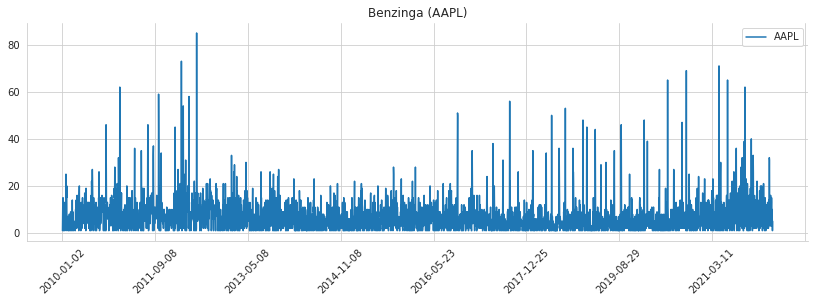

In [23]:
ax = df_aapl_groupedby_date["AAPL"].plot(title='Benzinga (AAPL)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Microsoft

In [24]:
df_msft_groupedby_date = df_msft_non_dupes.groupby('date').count()
df_msft_groupedby_date.reset_index(inplace=True)
df_msft_groupedby_date.set_index("date", inplace=True)
df_msft_groupedby_date = df_msft_groupedby_date[["MSFT"]]

In [25]:
df_msft_groupedby_date.describe()

,MSFT
count,3089.000000
mean,3.574620
std,3.261044
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,32.000000


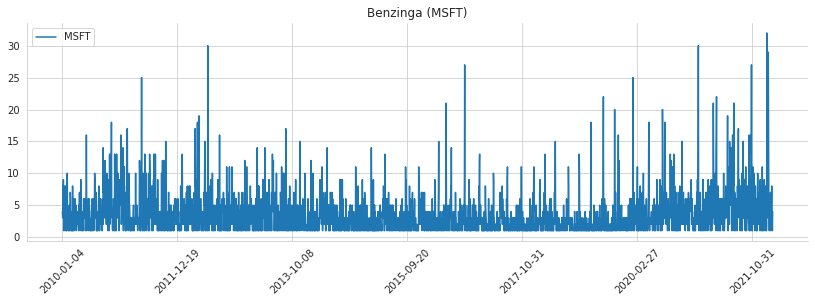

In [26]:
ax = df_msft_groupedby_date["MSFT"].plot(title='Benzinga (MSFT)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Amazon

In [27]:
df_amzn_groupedby_date = df_amzn_non_dupes.groupby('date').count()
df_amzn_groupedby_date.reset_index(inplace=True)
df_amzn_groupedby_date.set_index("date", inplace=True)
df_amzn_groupedby_date = df_amzn_groupedby_date[["AMZN"]]

In [28]:
df_amzn_groupedby_date.describe()

,AMZN
count,3359.000000
mean,4.717773
std,4.331638
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,46.000000


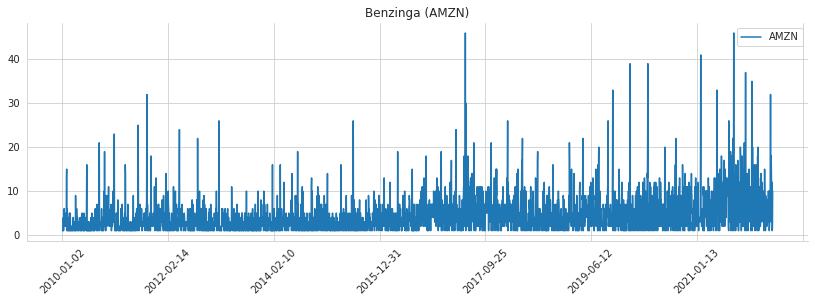

In [29]:
ax = df_amzn_groupedby_date["AMZN"].plot(title='Benzinga (AMZN)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Facebook

In [30]:
df_fb_groupedby_date = df_fb_non_dupes.groupby('date').count()
df_fb_groupedby_date.reset_index(inplace=True)
df_fb_groupedby_date.set_index("date", inplace=True)
df_fb_groupedby_date = df_fb_groupedby_date[["FB"]]

In [31]:
df_fb_groupedby_date.describe()

,FB
count,2765.000000
mean,4.427486
std,4.578813
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,65.000000


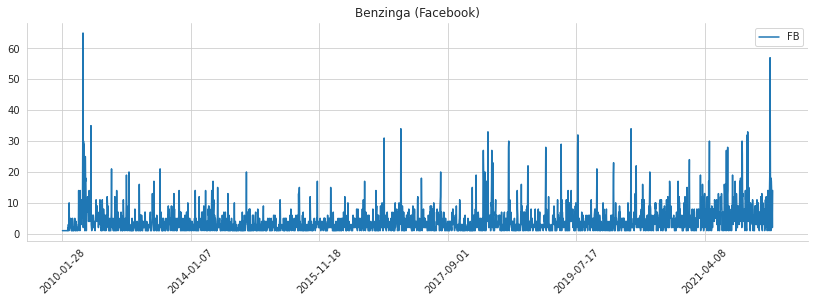

In [32]:
ax = df_fb_groupedby_date["FB"].plot(title='Benzinga (Facebook)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# NVIDIA

In [33]:
df_nvda_groupedby_date = df_nvda_non_dupes.groupby('date').count()
df_nvda_groupedby_date.reset_index(inplace=True)
df_nvda_groupedby_date.set_index("date", inplace=True)
df_nvda_groupedby_date = df_nvda_groupedby_date[["NVDA"]]

In [34]:
df_nvda_groupedby_date.describe()

,NVDA
count,1706.000000
mean,2.868113
std,3.270532
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,33.000000


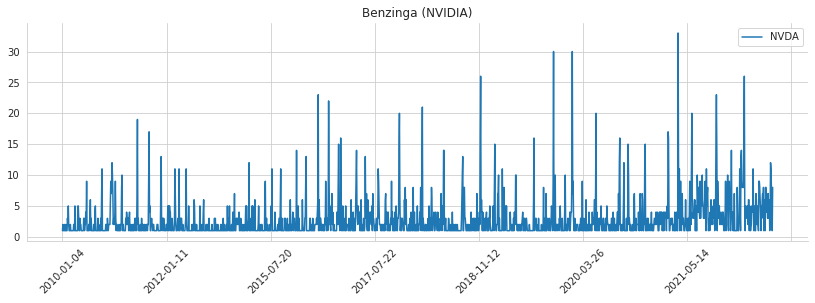

In [35]:
ax = df_nvda_groupedby_date["NVDA"].plot(title='Benzinga (NVIDIA)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

# Intel

In [36]:
df_intc_groupedby_date = df_intc_non_dupes.groupby('date').count()
df_intc_groupedby_date.reset_index(inplace=True)
df_intc_groupedby_date.set_index("date", inplace=True)
df_intc_groupedby_date = df_intc_groupedby_date[["INTC"]]

In [37]:
df_intc_groupedby_date.describe()

,INTC
count,2344.000000
mean,2.752133
std,3.338685
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,42.000000


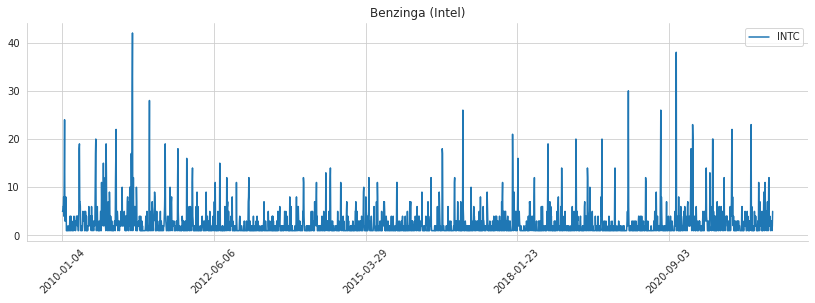

In [38]:
ax = df_intc_groupedby_date["INTC"].plot(title='Benzinga (Intel)',
           legend=True,
           figsize=(14, 4),
           rot=0)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.despine()

In [39]:
# df_aapl_non_dupes.to_csv(csv_path + "aapl_non_dupes.csv", index=False)

In [44]:
df_aapl_non_dupes.iloc[5]["title"]

'Apple Inc. (AAPL) Maintains A Buy Rating'

In [45]:
df_aapl_non_dupes.iloc[5]["body"]

'Analysts at CLSA Asia-Pacific Markets have maintained a Buy rating for Apple Inc. (NASDAQ: <a class="ticker" href="/stock/aapl#NASDAQ">AAPL</a>). Analysts have set a 12 month price target of $260 for Apple. \r\n\r\nApple shares have rallied 10% over the past two weeks on the anticipation of a major product announcement. Analysts feel that the rally is impressive considering the facts that, one, Google Inc. (NASDAQ: <a class="ticker" href="/stock/goog#NASDAQ">GOOG</a>) is planning its own branded phone, two, potential revamp of the iTunes business model and three, a brief wireless network interruptions resulting in rising data usage rates.\r\n\r\nAnalysts believe that this week’s Consumer Electronic Show will be a test for Apple as competitors would take advantage of Apple’s absence with announcements of new products. Analysts have not included the announcement of the much anticipated tablet product in their estimates. However analysts feel that the anticipation of a product announceme